In [1]:
#%matplotlib inline
%pylab inline


from threeML import *


Populating the interactive namespace from numpy and matplotlib
You don't have ROOT installed (or pyROOT configured). You cannot use the MINUIT minimizer.





In [28]:
powerlaw1 = PowerLaw()
ptsrc1 = PointSource("Source 1",10.0,20.0,powerlaw1)



In [29]:
powerlaw1

Spectral model: Powerlaw
Formula:



<IPython.core.display.Latex object>


Current parameters:



Name,Value,Minimum,Maximum,Delta,Status,Unit,Prior
string40,float64,float64,float64,float64,string40,string48,string160
gamma,-2.0,-10.0,10.0,0.1,free,,UniformPrior
A,1.0,1e-10,10000000000.0,0.02,free,,LogUniformPrior
Epiv,1.0,1e-10,10000000000.0,1.0,fixed,,UniformPrior


In [27]:
asaf = AsafModel()

In [28]:
asaf

Spectral model: SubPhotosphericDissipation
Formula:



<IPython.core.display.Latex object>


Current parameters:



Name,Value,Minimum,Maximum,Delta,Status,Unit,Prior
string72,float64,float64,float64,float64,string40,string48,string160
Tau,1.0,1.0,10.0,0.1,free,,UniformPrior
Gamma,50.0,50.0,500.0,0.02,free,,UniformPrior
LGRB,0.1,100.0,10000000000.0,1.0,free,,UniformPrior
epsilon_d,0.2,0.2,0.699999,1.0,free,,UniformPrior


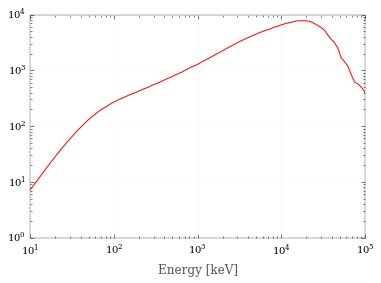

In [32]:

asaf.LGRB = 100.
asaf.epsilon_d = .5
asaf.Tau = 10
asaf.Gamma = 400
asaf.display(10,1E5,fluxType='vfv')

In [3]:
p = PowerLaw()
co = ExponentialCutoff()

In [4]:
cpl = p*co

In [15]:
g.mu=1000
g.sigma = 100

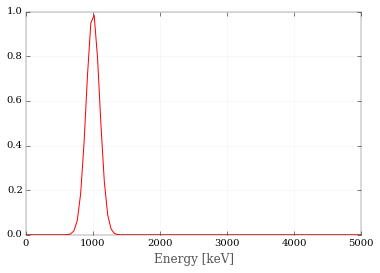

In [16]:
g.display(fluxType='ph',logscale=False)
#ylim(bottom=1E-1)

In [9]:
band = BandTable()

In [10]:
band

Spectral model: Band function [Band et al. 1993]
Formula:



<IPython.core.display.Latex object>


Current parameters:



Name,Value,Minimum,Maximum,Delta,Status,Unit,Prior
string40,float64,float64,float64,float64,string40,string48,string160
alpha,-1.0,-10.0,10.0,0.1,free,,UniformPrior
beta,-2.0,-10.0,10.0,0.1,free,,UniformPrior
E0,500.0,10.0,100000.0,50.0,free,keV,UniformPrior
K,1.0,0.0001,1000.0,0.1,free,,LogUniformPrior


(10, 100000.0)

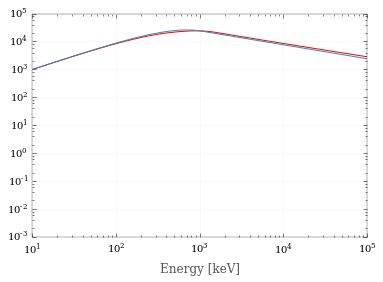

In [21]:
b=-2.5
a=-1
ep = 700
aa=1.


band.beta  = b
band.alpha = a
band.E0    = ep
band.K = aa
band.display(10,1E5,fluxType="vfv")

loglog(eGrid,eGrid**2 * BandF(eGrid,aa,ep,a,b))
xlim(10,1E5)


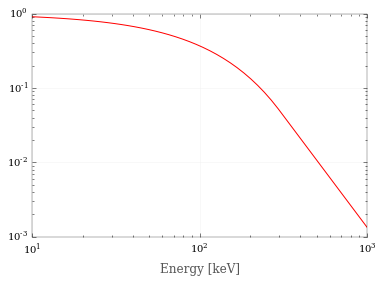

In [11]:
b.E0=100
b.alpha = 0
b.beta = -3
b.display(10,1000)

In [4]:
powerlaw1.gamma

               gamma:         -2        -10         10        0.1 free 

In [4]:
lm = LikelihoodModel(ptsrc1,ptsrc2)

In [6]:
m = ModelInterface(lm)

In [7]:
m.getNumberOfPointSources()

2

In [8]:
fakePlugin = FakePlugin(m)

In [9]:
fakePlugin.createEnergies(10)

In [10]:
fakePlugin.go()

In [17]:
from astropy.table import Table

In [18]:
t=Table()

In [19]:
t.colnames

[]

#  Testing pythonic Tables

In [2]:
def BandF( x, A, Ep, alpha, beta):

	cond1 = x < (alpha-beta)*Ep/(2+alpha)
	cond2 = x >= (alpha-beta)*Ep/(2+alpha)



        band = np.piecewise(x, [cond1, cond2],\
				    [lambda x: A*( power(x/100., alpha) * exp(-x*(2+alpha)/Ep) ), \
					     lambda x:A* ( power( (alpha -beta)*Ep/(100.*(2+alpha)),alpha-beta)*exp(beta-alpha)*power(x/100.,beta))])

        return band





In [3]:
ampGrid   = logspace(-2,2,4)
epGrid    = logspace(1,3,5)
alphaGrid = linspace(-1.5,0,10)
betaGrid  = linspace(-4.,-2.,10)
eGrid = logspace(-4,6,1E3)

In [4]:
params = [ampGrid,epGrid,alphaGrid,betaGrid]

In [5]:
tableModel = []
for a in ampGrid:
    tmp = []
    for ep in epGrid:
        tmp2 = []
        
        for alpha in alphaGrid:
            tmp3 = []
            
            for beta in betaGrid:
                tmp3.append(BandF(eGrid,a,ep,alpha,beta))
            tmp2.append(tmp3)
        tmp.append(tmp2)
    tableModel.append(tmp)
        
            
                
                
                
tableModel = array(tableModel)        

In [6]:
from threeML.models.tablemodel import MakeNumpyTableModel

In [7]:
MakeNumpyTableModel(params,eGrid,tableModel,"fluxModels/band.npz")

In [8]:

test = numpy.load("test.npz")

In [45]:
test["energy"]

array([  1.00000000e-04,   1.02331658e-04,   1.04717682e-04,
         1.07159340e-04,   1.09657929e-04,   1.12214777e-04,
         1.14831241e-04,   1.17508713e-04,   1.20248614e-04,
         1.23052400e-04,   1.25921561e-04,   1.28857621e-04,
         1.31862140e-04,   1.34936714e-04,   1.38082977e-04,
         1.41302599e-04,   1.44597292e-04,   1.47968806e-04,
         1.51418933e-04,   1.54949504e-04,   1.58562396e-04,
         1.62259529e-04,   1.66042866e-04,   1.69914417e-04,
         1.73876240e-04,   1.77930439e-04,   1.82079168e-04,
         1.86324631e-04,   1.90669084e-04,   1.95114835e-04,
         1.99664245e-04,   2.04319732e-04,   2.09083769e-04,
         2.13958887e-04,   2.18947676e-04,   2.24052787e-04,
         2.29276931e-04,   2.34622885e-04,   2.40093488e-04,
         2.45691646e-04,   2.51420335e-04,   2.57282597e-04,
         2.63281547e-04,   2.69420371e-04,   2.75702333e-04,
         2.82130768e-04,   2.88709092e-04,   2.95440800e-04,
         3.02329468e-04,

ValueError: could not broadcast input array from shape (4,4,4,4,1000) into shape (4)